dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
#load data
full_data = pd.read_csv('data.csv')

#get rid of unused column
full_data = full_data.drop('Unnamed: 32', axis=1)

#let's take a look
display(full_data.head())
print full_data.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


In [3]:
#seperate id and label data 
id_data = full_data['id']
labels = full_data['diagnosis']

#get class distribution
labels.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
data = full_data.drop('id', axis=1)

diagnosis
B    [[Axes(0.125,0.796667;0.125x0.103333), Axes(0....
M    [[Axes(0.125,0.796667;0.125x0.103333), Axes(0....
dtype: object

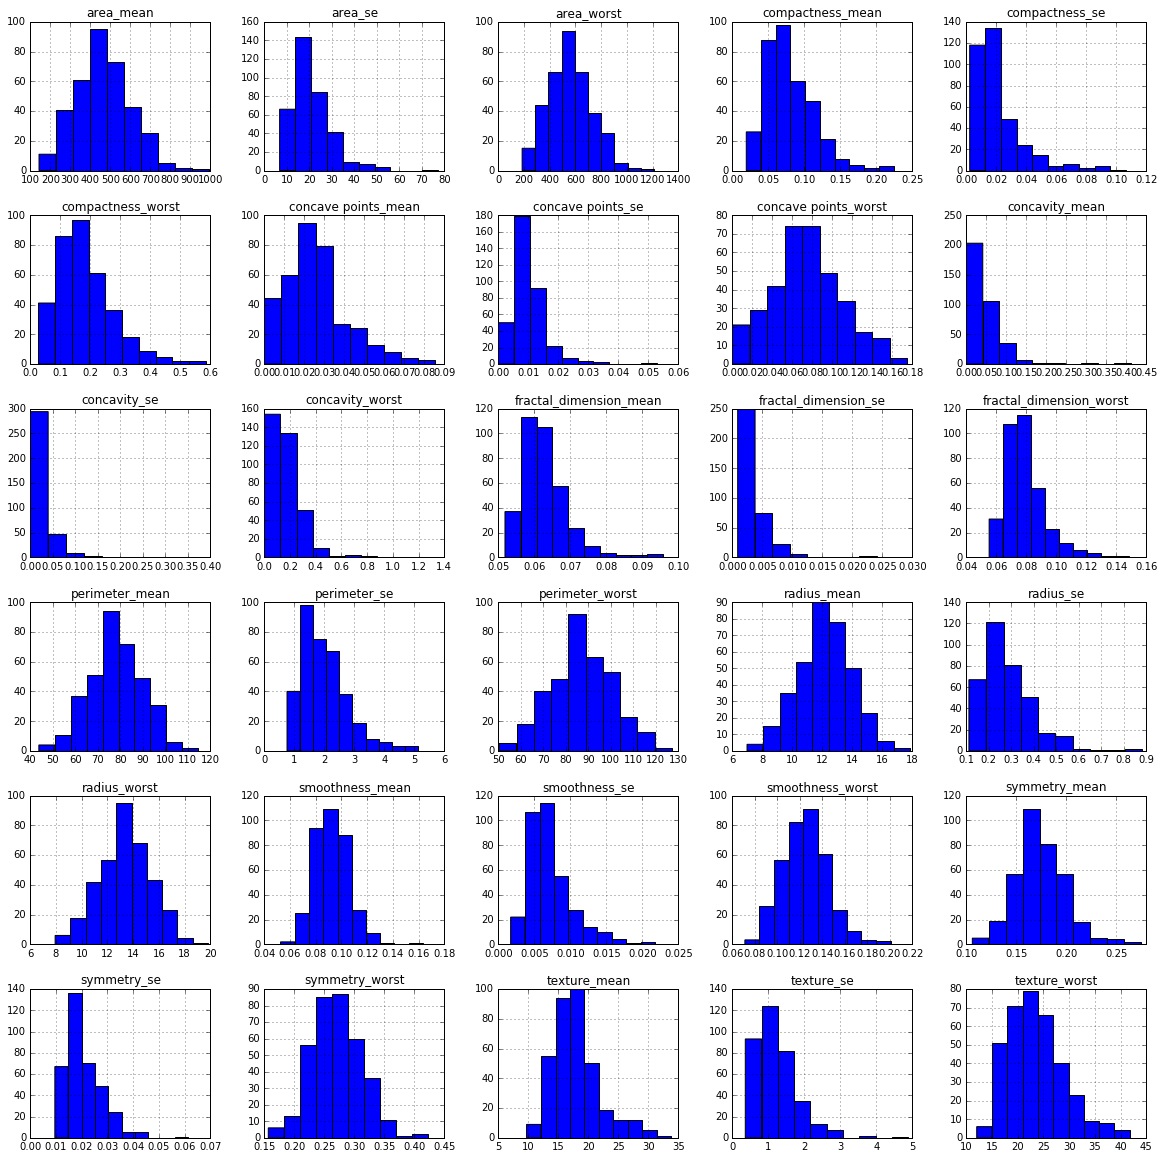

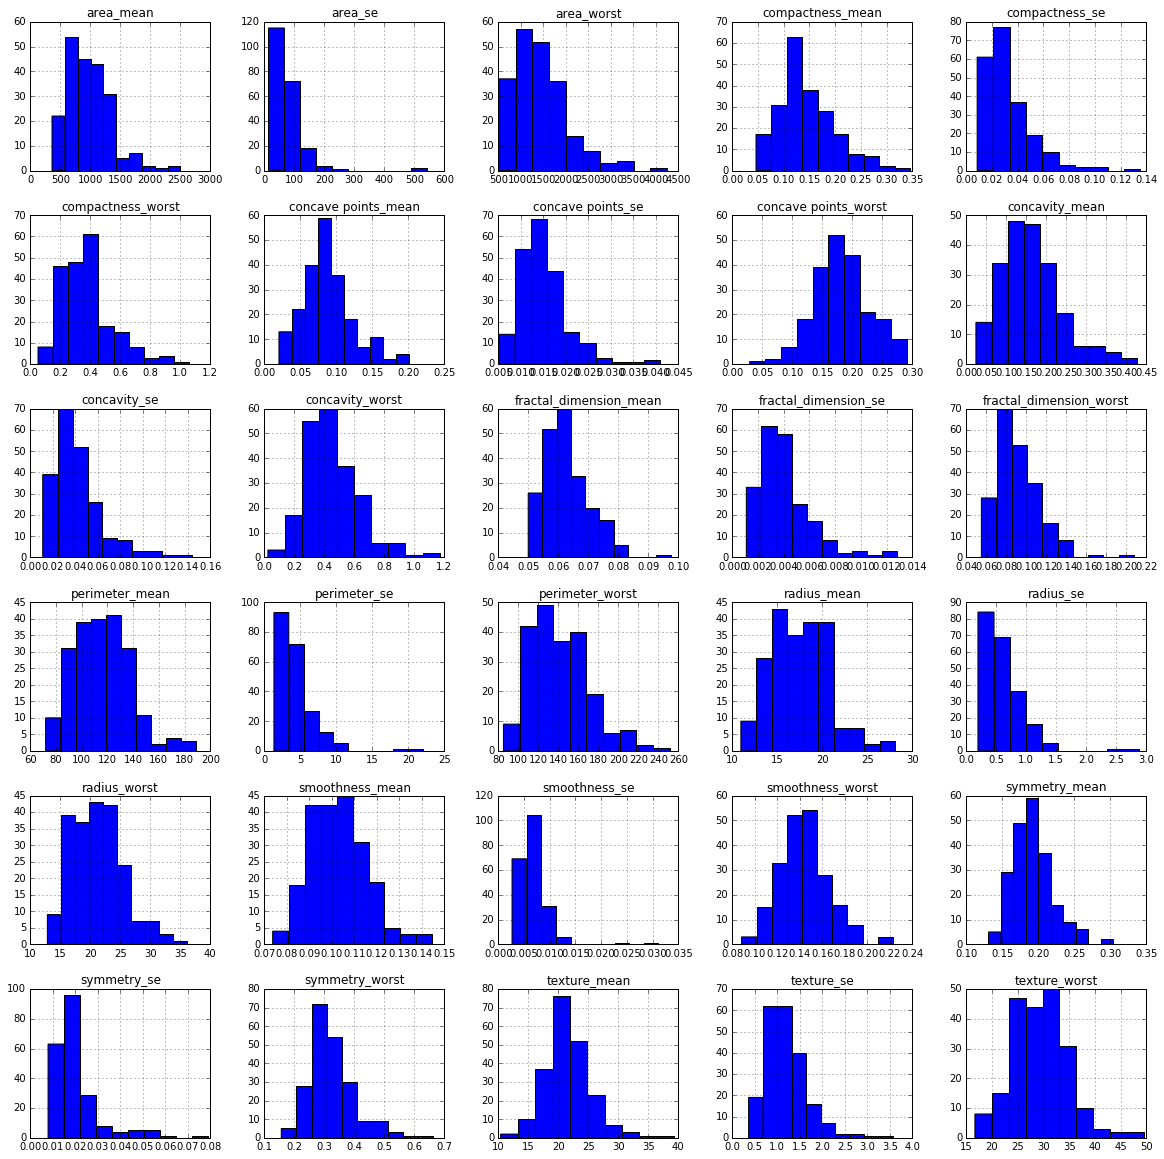

In [5]:
#visualize feature distributions by diagnosis
data.groupby('diagnosis').hist(figsize = (20, 20))

In [6]:
data = data.drop('diagnosis', axis=1)
labels = labels.map({'B': 0, 'M': 1})
display(data.head())
print "Feature columns ({} total features):\n{}".format(len(data.columns), list(data.columns))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Feature columns (30 total features):
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
#scale data before manifold learning
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

<function matplotlib.pyplot.show>

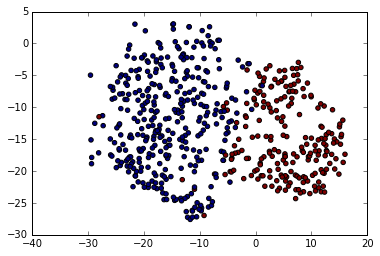

In [8]:
#visualize the distribution of data as a whole
from sklearn.manifold import TSNE
tsne = TSNE(init='pca')
tsne_vis = tsne.fit_transform(scaled_data)
plt.scatter(tsne_vis[:,0], tsne_vis[:,1], c=labels)
plt.show

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#make scorer to evaluate classifiers
f1_scorer = make_scorer(f1_score, pos_label = 0)

In [10]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = .15, random_state=133)

In [11]:
#explore classifier performance

xtratrees = ExtraTreesClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

print "For decision tree benchmark:"
dtscores = cross_val_score(decisiontree, data, labels, scoring = f1_scorer)
print dtscores
print dtscores.mean()

print "For random forest:"
rfscores = cross_val_score(randomforest, data, labels, scoring = f1_scorer)
print rfscores
print rfscores.mean()

print "For extra tree classifier:"
scores = cross_val_score(xtratrees, data, labels, scoring = f1_scorer)
print scores
print scores.mean()

For decision tree benchmark:
[ 0.91139241  0.9626556   0.88990826]
0.921318754535
For random forest:
[ 0.94560669  0.96356275  0.97046414]
0.959877860873
For extra tree classifier:
[ 0.95867769  0.97119342  0.97478992]
0.968220339185


In [12]:
#benchmark confusion matrix
from sklearn.metrics import confusion_matrix
dt_predict = decisiontree.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, dt_predict)

array([[55,  3],
       [ 0, 28]])

In [13]:
#majority vote benchmark
majority_vote_predictions = np.zeros(data.shape[0])
print "f1 score for simple majority vote is {:.4f}".format(f1_score(labels, majority_vote_predictions, pos_label = 0))

f1 score for simple majority vote is 0.7711


In [14]:
from sklearn.svm import SVC
svc=SVC()
svcscores = cross_val_score(svc, data, labels, scoring = f1_scorer)
print svcscores
print svcscores.mean()

[ 0.77022654  0.77022654  0.77272727]
0.77106011572


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
#define parameter grid of values to exhaustively search to find the best performing set of hyper-parameters for each model
parameters = [{'n_estimators': np.arange(10,150,10), 'max_features': np.arange(5,30,5), 
                 'min_samples_split': np.arange(2, 8, 2)}]

In [17]:
extratreetune = ExtraTreesClassifier()
randtreetune = RandomForestClassifier()
xtra_grid = GridSearchCV(extratreetune, parameters, scoring = f1_scorer)
rand_grid = GridSearchCV(randtreetune, parameters, scoring = f1_scorer)

In [18]:
xtra_grid = xtra_grid.fit(X_train, y_train)
rand_grid = rand_grid.fit(X_train, y_train)

In [19]:
#display most effective models
print xtra_grid.best_estimator_
print rand_grid.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=20, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=130, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [20]:
extratreetune = xtra_grid.best_estimator_
randtreetune = rand_grid.best_estimator_

In [21]:
extratreetune.fit_transform(X_train, y_train)
randtreetune.fit_transform(X_train, y_train)

C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  8.72100000e+01,   5.30200000e+02,   2.07100000e-01, ...,
          8.27200000e+02,   6.37600000e-01,   1.98600000e-01],
       [  1.10000000e+02,   9.04600000e+02,   1.52500000e-01, ...,
          2.21500000e+03,   4.69500000e-01,   2.09500000e-01],
       [  7.63900000e+01,   4.33800000e+02,   2.55500000e-02, ...,
          5.22900000e+02,   1.16400000e-01,   8.26300000e-02],
       ..., 
       [  1.42000000e+02,   1.47900000e+03,   2.43900000e-01, ...,
          2.02700000e+03,   4.10700000e-01,   2.21600000e-01],
       [  1.32900000e+02,   1.32600000e+03,   8.69000000e-02, ...,
          1.95600000e+03,   2.41600000e-01,   1.86000000e-01],
       [  1.25500000e+02,   1.15200000e+03,   1.32300000e-01, ...,
          2.14500000e+03,   3.87900000e-01,   2.09100000e-01]])

In [22]:
print "f1 training score for tuned extremely randomized forest model is {:.4f}".format(f1_score(y_train, extratreetune.predict(X_train), pos_label = 0))
print "f1 training score for tuned random forest model is {:.4f}".format(f1_score(y_train, randtreetune.predict(X_train), pos_label = 0))

f1 training score for tuned extremely randomized forest model is 1.0000
f1 training score for tuned random forest model is 1.0000


In [23]:
print "f1 testing score for tuned extremely randomized forest model is {:.4f}".format(f1_score(y_test, extratreetune.predict(X_test), pos_label = 0))
print "f1 testing score for tuned random forest model is {:.4f}".format(f1_score(y_test, randtreetune.predict(X_test), pos_label = 0))

f1 testing score for tuned extremely randomized forest model is 0.9913
f1 testing score for tuned random forest model is 0.9825


In [24]:
confusion_matrix(y_test, extratreetune.predict(X_test))

array([[57,  1],
       [ 0, 28]])

In [25]:
#investigate feature importances
feat_xt = ExtraTreesClassifier()
feat_xt = xtra_grid.best_estimator_
feat_xt = feat_xt.fit(data, labels)

feat_imp = feat_xt.feature_importances_

<function matplotlib.pyplot.show>

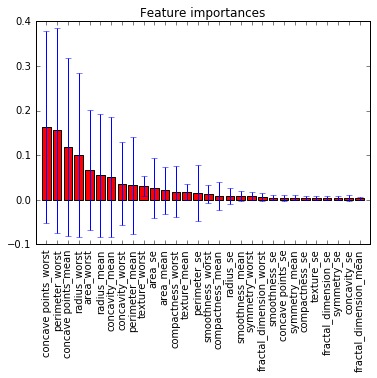

In [26]:
std = np.std([tree.feature_importances_ for tree in extratreetune.estimators_], axis=0)
indices = np.argsort(feat_imp)[::-1]
label_features_sorted=[]
header = list(data.columns.values)
for i in indices:
    label_features_sorted.append(header[i])
    
plt.title("Feature importances")
plt.bar(range(data.shape[1]), feat_imp[indices], color = "r", yerr = std[indices], align="center")
plt.xticks(range(data.shape[1]), label_features_sorted, rotation=90)
plt.xlim([-1, data.shape[1]])
plt.show